## Linear Regression Example 2

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
np.random.seed(0)

### Step 1. Data

In [16]:
def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)

### Plot the data

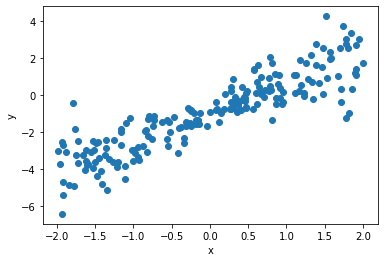

In [17]:
x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Train/Test data

In [19]:
epoch=100
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

### Step 2. Linear Regression Model

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric

In [21]:
model.compile(optimizer='sgd', loss='mse')

### Step 4. Train the model

In [22]:
history = model.fit(x_train, y_train, epochs=epoch, 
                    validation_split=0.3)

Epoch 1/100
4/4 [==============================] - 0s 39ms/step - loss: 1.6620 - val_loss: 1.3961
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5360 - val_loss: 1.2967
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.4120 - val_loss: 1.2092
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 1.3087 - val_loss: 1.1521
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 1.2361 - val_loss: 1.0993
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1660 - val_loss: 1.0459
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0950 - val_loss: 1.0068
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0428 - val_loss: 0.9795
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0007 - val_loss: 0.9578
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9685 - val_loss: 0.9381
Epoch 11/100
4/4 [==========

4/4 [==============================] - 0s 6ms/step - loss: 0.7594 - val_loss: 0.9004
Epoch 85/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7573 - val_loss: 0.8943
Epoch 86/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7573 - val_loss: 0.8952
Epoch 87/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7569 - val_loss: 0.8978
Epoch 88/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7569 - val_loss: 0.8950
Epoch 89/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7581 - val_loss: 0.8955
Epoch 90/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7562 - val_loss: 0.8976
Epoch 91/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7564 - val_loss: 0.8989
Epoch 92/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7564 - val_loss: 0.9036
Epoch 93/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7563 - val_loss: 0.9012
Epoch 94/100
4/4 [===============

### Step 5. Test the model

In [23]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.9465


0.9464576244354248

### Plot the Training/Validation loss

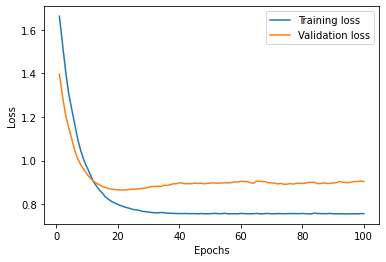

In [24]:
epochs = np.arange(1, epoch+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot the Regression Results

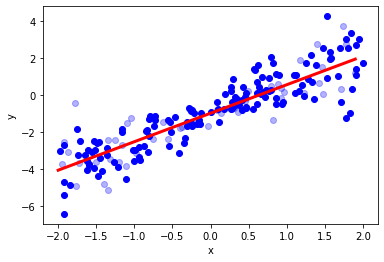

In [25]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
